In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os
import more_itertools as mit
import missingno as msno


Error importing optional module geopandas
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/_plotly_utils/optional_imports.py", line 28, in get_module
    return import_module(name)
  File "/opt/anaconda3/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/opt/anaconda3/lib/python3.7/site-packages/geopandas/__init__.py", line 1, in <module>
    from geopandas.geoseries import GeoSeries  # noqa
  File "/opt/anaconda3/lib/python3.7/site-package

In [87]:
house_data = pd.read_csv("/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/clean_data_v3.csv")

In [88]:
house_data.head()

,date,Month,DayOfWeek,HourofDay,Day,DateTime,HvacMode,Event,Schedule,T_ctrl,...,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,Season,timing,Date
0,2019-01-01,1,1,0,1,2019-01-01 00:00:00,heat,Hold,Sleep,70.0,...,165.0,70.0,0.0,67.0,0.0,41.0,95.0,Winter,Night,2019-01-01
1,2019-01-01,1,1,0,1,2019-01-01 00:05:00,heat,Hold,Sleep,70.0,...,135.0,70.0,0.0,67.0,0.0,41.0,95.0,Winter,Night,2019-01-01
2,2019-01-01,1,1,0,1,2019-01-01 00:10:00,heat,Hold,Sleep,70.0,...,300.0,70.0,0.0,67.0,0.0,41.0,95.0,Winter,Night,2019-01-01
3,2019-01-01,1,1,0,1,2019-01-01 00:15:00,heat,Hold,Sleep,70.0,...,180.0,70.0,0.0,67.0,0.0,41.0,95.0,Winter,Night,2019-01-01
4,2019-01-01,1,1,0,1,2019-01-01 00:20:00,heat,Hold,Sleep,70.0,...,120.0,70.0,0.0,67.0,0.0,41.0,95.0,Winter,Night,2019-01-01


In [89]:
house_data = house_data.drop(house_data[house_data['auxHeat1'].isnull()].index.tolist())

In [90]:
house_data = house_data[['DateTime','Month','DayOfWeek','HourofDay','Day','T_ctrl', 'T_stp_heat', 'T_out', 'RH_out','Humidity','fan','auxHeat1','Thermostat_Temperature']]

In [91]:
house_data.head()

,DateTime,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,Thermostat_Temperature
0,2019-01-01 00:00:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,165.0,0.0,70.0
1,2019-01-01 00:05:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,135.0,30.0,70.0
2,2019-01-01 00:10:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,300.0,300.0,70.0
3,2019-01-01 00:15:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,180.0,135.0,70.0
4,2019-01-01 00:20:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,120.0,0.0,70.0


In [92]:
house_data.count()

DateTime                  56226
Month                     56226
DayOfWeek                 56226
HourofDay                 56226
Day                       56226
T_ctrl                    56226
T_stp_heat                56226
T_out                     56226
RH_out                    56226
Humidity                  56226
fan                       56226
auxHeat1                  56226
Thermostat_Temperature    56226
dtype: int64

In [93]:
house_data.columns

Index(['DateTime', 'Month', 'DayOfWeek', 'HourofDay', 'Day', 'T_ctrl',
       'T_stp_heat', 'T_out', 'RH_out', 'Humidity', 'fan', 'auxHeat1',
       'Thermostat_Temperature'],
      dtype='object')

In [94]:
house_data.head()

,DateTime,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,Thermostat_Temperature
0,2019-01-01 00:00:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,165.0,0.0,70.0
1,2019-01-01 00:05:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,135.0,30.0,70.0
2,2019-01-01 00:10:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,300.0,300.0,70.0
3,2019-01-01 00:15:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,180.0,135.0,70.0
4,2019-01-01 00:20:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,120.0,0.0,70.0


In [95]:
house_data.Month.unique()

array([ 1,  2,  3,  4, 10, 11, 12])

In [96]:
house_data.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [97]:
house_data.HourofDay.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [98]:
house_data.auxHeat1.unique()


array([  0.,  30., 300., 135., 210., 285.,  60., 120.,  75., 105., 195.,
        15., 165., 270.,  90., 150., 225.,  45., 255., 180., 240.])

In [99]:
house_data.auxHeat1.min()

0.0

In [100]:
house_data.auxHeat1.max()

300.0

In [101]:
house_data.count()

DateTime                  56226
Month                     56226
DayOfWeek                 56226
HourofDay                 56226
Day                       56226
T_ctrl                    56226
T_stp_heat                56226
T_out                     56226
RH_out                    56226
Humidity                  56226
fan                       56226
auxHeat1                  56226
Thermostat_Temperature    56226
dtype: int64

In [102]:
house_data.count()

DateTime                  56226
Month                     56226
DayOfWeek                 56226
HourofDay                 56226
Day                       56226
T_ctrl                    56226
T_stp_heat                56226
T_out                     56226
RH_out                    56226
Humidity                  56226
fan                       56226
auxHeat1                  56226
Thermostat_Temperature    56226
dtype: int64

In [103]:
# plt.figure(figsize = (20, 15))
# ax = sns.distplot(house_data.auxHeat1)
# ax.set(xlabel = 'Target Variable Values')

In [104]:
df = house_data
df.columns

Index(['DateTime', 'Month', 'DayOfWeek', 'HourofDay', 'Day', 'T_ctrl',
       'T_stp_heat', 'T_out', 'RH_out', 'Humidity', 'fan', 'auxHeat1',
       'Thermostat_Temperature'],
      dtype='object')

In [105]:
df

,DateTime,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,Thermostat_Temperature
0,2019-01-01 00:00:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,165.0,0.0,70.0
1,2019-01-01 00:05:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,135.0,30.0,70.0
2,2019-01-01 00:10:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,300.0,300.0,70.0
3,2019-01-01 00:15:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,180.0,135.0,70.0
4,2019-01-01 00:20:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,120.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56221,2019-12-31 23:35:00,12,1,23,31,70.0,70.0,31.0,67.0,30.0,300.0,0.0,70.0
56222,2019-12-31 23:40:00,12,1,23,31,70.0,70.0,31.0,67.0,31.0,240.0,0.0,70.0
56223,2019-12-31 23:45:00,12,1,23,31,70.0,70.0,31.0,67.0,31.0,60.0,0.0,70.0
56224,2019-12-31 23:50:00,12,1,23,31,70.0,70.0,31.0,67.0,30.0,300.0,0.0,70.0


In [106]:
df['combined']=df['Month'].astype(str)+'_'+df['Day'].astype(str)+'_'+df['HourofDay'].astype(str)
df

,DateTime,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,Thermostat_Temperature,combined
0,2019-01-01 00:00:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,165.0,0.0,70.0,1_1_0
1,2019-01-01 00:05:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,135.0,30.0,70.0,1_1_0
2,2019-01-01 00:10:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,300.0,300.0,70.0,1_1_0
3,2019-01-01 00:15:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,180.0,135.0,70.0,1_1_0
4,2019-01-01 00:20:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,120.0,0.0,70.0,1_1_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56221,2019-12-31 23:35:00,12,1,23,31,70.0,70.0,31.0,67.0,30.0,300.0,0.0,70.0,12_31_23
56222,2019-12-31 23:40:00,12,1,23,31,70.0,70.0,31.0,67.0,31.0,240.0,0.0,70.0,12_31_23
56223,2019-12-31 23:45:00,12,1,23,31,70.0,70.0,31.0,67.0,31.0,60.0,0.0,70.0,12_31_23
56224,2019-12-31 23:50:00,12,1,23,31,70.0,70.0,31.0,67.0,30.0,300.0,0.0,70.0,12_31_23


In [107]:
# def f(row):
#     if row['auxHeat1'] >= 0.0 and row['auxHeat1'] < 900.0:
#         val = 900.0
#     elif row['auxHeat1'] > 900.0 and row['auxHeat1'] < 1800.0:
#         val = 1800.0
#     elif row['auxHeat1'] > 1800.0 and row['auxHeat1'] < 2700.0:
#         val = 2700.00
#     else:
#         val = 3600.00
#     return val

In [108]:
#df['auxHeat1'] = df.apply(f, axis =1) 

In [109]:
#df['auxHeat1'].unique()

In [110]:
df.head()

,DateTime,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,Thermostat_Temperature,combined
0,2019-01-01 00:00:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,165.0,0.0,70.0,1_1_0
1,2019-01-01 00:05:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,135.0,30.0,70.0,1_1_0
2,2019-01-01 00:10:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,300.0,300.0,70.0,1_1_0
3,2019-01-01 00:15:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,180.0,135.0,70.0,1_1_0
4,2019-01-01 00:20:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,120.0,0.0,70.0,1_1_0


In [111]:
numerical_vars = ['Month','DayOfWeek','HourofDay','Day','T_ctrl', 'T_stp_heat', 'T_out', 'RH_out','Humidity','fan','Thermostat_Temperature']
predsc = StandardScaler()
predsc.fit(df[numerical_vars])
scalar_data = predsc.transform(df[numerical_vars])

In [112]:

y_auxHeat = df[['auxHeat1']].to_numpy()
targsc = StandardScaler()
targsc.fit(y_auxHeat)
y_auxHeat = targsc.transform(y_auxHeat)

# y_auxHeat = df[['auxHeat1']].to_numpy()
# oe = OrdinalEncoder()
# y_auxHeat = oe.fit_transform(y_auxHeat.reshape(-1, 1))

In [113]:
y_auxHeat

array([[-0.69680782],
       [-0.4627674 ],
       [ 1.64359632],
       ...,
       [-0.69680782],
       [-0.69680782],
       [ 0.00531342]])

In [114]:
s=df[numerical_vars].copy()
s[numerical_vars]=scalar_data
s["auxHeat1"] = y_auxHeat
s['combined']=df['combined']
# s['DateTime']=df['DateTime']
s.head(10)

,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,Thermostat_Temperature,auxHeat1,combined
0,-1.241051,-1.007796,-1.637953,-1.727365,0.48126,0.590083,0.458426,1.769546,0.427681,-0.422530,0.474295,-0.696808,1_1_0
1,-1.241051,-1.007796,-1.637953,-1.727365,0.48126,0.590083,0.458426,1.769546,0.427681,-0.715364,0.474295,-0.462767,1_1_0
2,-1.241051,-1.007796,-1.637953,-1.727365,0.48126,0.590083,0.458426,1.769546,0.427681,0.895223,0.474295,1.643596,1_1_0
3,-1.241051,-1.007796,-1.637953,-1.727365,0.48126,0.590083,0.458426,1.769546,0.427681,-0.276113,0.474295,0.356374,1_1_0
4,-1.241051,-1.007796,-1.637953,-1.727365,0.48126,0.590083,0.458426,1.769546,0.427681,-0.861782,0.474295,-0.696808,1_1_0
5,-1.241051,-1.007796,-1.637953,-1.727365,0.48126,0.590083,0.458426,1.769546,0.427681,0.895223,0.474295,-0.696808,1_1_0
6,-1.241051,-1.007796,-1.637953,-1.727365,0.48126,0.590083,0.536885,1.842579,0.427681,-0.422530,0.474295,-0.696808,1_1_0
7,-1.241051,-1.007796,-1.637953,-1.727365,0.48126,0.590083,0.536885,1.842579,0.427681,-0.715364,0.474295,-0.696808,1_1_0
8,-1.241051,-1.007796,-1.637953,-1.727365,0.48126,0.590083,0.536885,1.842579,0.427681,0.895223,0.474295,0.941475,1_1_0
9,-1.241051,-1.007796,-1.637953,-1.727365,0.48126,0.590083,0.536885,1.842579,0.427681,0.895223,0.474295,1.526576,1_1_0


In [115]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    
    n_vars = data.shape[1]
    columns = data.columns
    df = pd.DataFrame(data)
    
    df_new = pd.DataFrame()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        for j in range(n_vars):
            df_new['var%d(t-%d)' % (j+1, i)] = df.shift(i)[columns[j]]
   
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        
        for j in range(n_vars):
            if i == 0:
                name = 'var%d(t)' % (j+1)
            else:
                name = 'var%d(t+%d)' % (j+1, i)
            df_new[name] = df.shift(-i)[columns[j]]
    
    if dropnan:
        df_new.dropna(inplace=True)
    return df_new

In [116]:
reframed = series_to_supervised(s[['T_out','T_stp_heat','RH_out','auxHeat1','Thermostat_Temperature']], 6, 1)
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
6,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.462767,0.474295,...,0.458426,0.590083,1.769546,-0.696808,0.474295,0.536885,0.590083,1.842579,-0.696808,0.474295
7,0.458426,0.590083,1.769546,-0.462767,0.474295,0.458426,0.590083,1.769546,1.643596,0.474295,...,0.536885,0.590083,1.842579,-0.696808,0.474295,0.536885,0.590083,1.842579,-0.696808,0.474295
8,0.458426,0.590083,1.769546,1.643596,0.474295,0.458426,0.590083,1.769546,0.356374,0.474295,...,0.536885,0.590083,1.842579,-0.696808,0.474295,0.536885,0.590083,1.842579,0.941475,0.474295
9,0.458426,0.590083,1.769546,0.356374,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,0.536885,0.590083,1.842579,0.941475,0.474295,0.536885,0.590083,1.842579,1.526576,0.474295
10,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,0.536885,0.590083,1.842579,1.526576,0.474295,0.536885,0.590083,1.842579,-0.696808,0.474295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56221,-0.326156,0.590083,-0.202330,0.473394,0.474295,-0.326156,0.590083,-0.202330,1.643596,0.474295,...,-0.326156,0.590083,-0.275362,-0.696808,0.474295,-0.326156,0.590083,-0.275362,-0.696808,0.474295
56222,-0.326156,0.590083,-0.202330,1.643596,0.474295,-0.326156,0.590083,-0.202330,1.643596,0.474295,...,-0.326156,0.590083,-0.275362,-0.696808,0.474295,-0.326156,0.590083,-0.275362,-0.696808,0.474295
56223,-0.326156,0.590083,-0.202330,1.643596,0.474295,-0.326156,0.590083,-0.202330,0.356374,0.474295,...,-0.326156,0.590083,-0.275362,-0.696808,0.474295,-0.326156,0.590083,-0.275362,-0.696808,0.474295
56224,-0.326156,0.590083,-0.202330,0.356374,0.474295,-0.326156,0.590083,-0.202330,-0.696808,0.474295,...,-0.326156,0.590083,-0.275362,-0.696808,0.474295,-0.326156,0.590083,-0.275362,-0.696808,0.474295


In [121]:
 #T_ctrl	T_stp_heat	T_out	RH_out	Humidity	fan	
reframed['T_ctrl']= s['T_ctrl']
reframed['Humidity']= s['Humidity']
reframed['fan']= s['fan']
reframed['combined']= s['combined']
reframed['Month']=s['Month']
reframed['DayOfWeek']=s['DayOfWeek']
reframed['HourofDay']=s['HourofDay']
reframed['Day']=s['Day']
# reframed['DateTime']=s['DateTime']
# Month	DayOfWeek	HourofDay	Day

In [122]:
reframed.columns

Index(['var1(t-6)', 'var2(t-6)', 'var3(t-6)', 'var4(t-6)', 'var5(t-6)',
       'var1(t-5)', 'var2(t-5)', 'var3(t-5)', 'var4(t-5)', 'var5(t-5)',
       'var1(t-4)', 'var2(t-4)', 'var3(t-4)', 'var4(t-4)', 'var5(t-4)',
       'var1(t-3)', 'var2(t-3)', 'var3(t-3)', 'var4(t-3)', 'var5(t-3)',
       'var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)', 'var5(t-2)',
       'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'T_ctrl',
       'Humidity', 'fan', 'combined', 'Month', 'DayOfWeek', 'HourofDay',
       'Day'],
      dtype='object')

In [123]:
# reframed = reframed.drop(['var5(t-6)','var5(t-5)','var5(t-4)','var5(t-3)','var5(t-2)','var5(t-1)'], axis=1)

In [124]:
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),...,var4(t),var5(t),T_ctrl,Humidity,fan,combined,Month,DayOfWeek,HourofDay,Day
6,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.462767,0.474295,...,-0.696808,0.474295,0.48126,0.427681,-0.422530,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365
7,0.458426,0.590083,1.769546,-0.462767,0.474295,0.458426,0.590083,1.769546,1.643596,0.474295,...,-0.696808,0.474295,0.48126,0.427681,-0.715364,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365
8,0.458426,0.590083,1.769546,1.643596,0.474295,0.458426,0.590083,1.769546,0.356374,0.474295,...,0.941475,0.474295,0.48126,0.427681,0.895223,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365
9,0.458426,0.590083,1.769546,0.356374,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,1.526576,0.474295,0.48126,0.427681,0.895223,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365
10,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,-0.696808,0.474295,0.48126,0.427681,-1.740284,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56221,-0.326156,0.590083,-0.202330,0.473394,0.474295,-0.326156,0.590083,-0.202330,1.643596,0.474295,...,-0.696808,0.474295,0.48126,-0.329644,0.895223,12_31_23,1.288277,-1.007796,1.664924,1.730497
56222,-0.326156,0.590083,-0.202330,1.643596,0.474295,-0.326156,0.590083,-0.202330,1.643596,0.474295,...,-0.696808,0.474295,0.48126,-0.221455,0.309555,12_31_23,1.288277,-1.007796,1.664924,1.730497
56223,-0.326156,0.590083,-0.202330,1.643596,0.474295,-0.326156,0.590083,-0.202330,0.356374,0.474295,...,-0.696808,0.474295,0.48126,-0.221455,-1.447450,12_31_23,1.288277,-1.007796,1.664924,1.730497
56224,-0.326156,0.590083,-0.202330,0.356374,0.474295,-0.326156,0.590083,-0.202330,-0.696808,0.474295,...,-0.696808,0.474295,0.48126,-0.329644,0.895223,12_31_23,1.288277,-1.007796,1.664924,1.730497


In [125]:
import pandas as pd
import glob
path = r'/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/Weather Data' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [126]:
wf = frame

In [127]:
wf.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Temp Flag',
       'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)',
       'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag',
       'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)',
       'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather'],
      dtype='object')

In [128]:
wf = wf.drop(labels = ['Temp Flag', 'Dew Point Temp Flag',
                                       'Rel Hum Flag', 'Wind Dir Flag', 
                                       'Wind Spd Flag', 'Visibility Flag', 
                                       'Stn Press Flag', 'Hmdx Flag', 
                                       'Wind Chill Flag'], 
                             axis = 1)

In [129]:
wf = wf.fillna(method='ffill')

In [130]:
wf.isnull().sum()

Longitude (x)             0
Latitude (y)              0
Station Name              0
Climate ID                0
Date/Time                 0
Year                      0
Month                     0
Day                       0
Time                      0
Temp (°C)                 0
Dew Point Temp (°C)       0
Rel Hum (%)               0
Wind Dir (10s deg)        0
Wind Spd (km/h)           0
Visibility (km)           0
Stn Press (kPa)           0
Hmdx                   1120
Wind Chill                0
Weather                   0
dtype: int64

In [131]:
wf.count()

Longitude (x)          8760
Latitude (y)           8760
Station Name           8760
Climate ID             8760
Date/Time              8760
Year                   8760
Month                  8760
Day                    8760
Time                   8760
Temp (°C)              8760
Dew Point Temp (°C)    8760
Rel Hum (%)            8760
Wind Dir (10s deg)     8760
Wind Spd (km/h)        8760
Visibility (km)        8760
Stn Press (kPa)        8760
Hmdx                   7640
Wind Chill             8760
Weather                8760
dtype: int64

In [132]:
wf['Hmdx'].fillna(wf['Hmdx'].median(), inplace=True)

In [133]:
wf.isnull().sum()

Longitude (x)          0
Latitude (y)           0
Station Name           0
Climate ID             0
Date/Time              0
Year                   0
Month                  0
Day                    0
Time                   0
Temp (°C)              0
Dew Point Temp (°C)    0
Rel Hum (%)            0
Wind Dir (10s deg)     0
Wind Spd (km/h)        0
Visibility (km)        0
Stn Press (kPa)        0
Hmdx                   0
Wind Chill             0
Weather                0
dtype: int64

In [134]:
wf

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 00:00,2019,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow
1,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 01:00,2019,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow
2,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 02:00,2019,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow
3,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 03:00,2019,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow
4,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 04:00,2019,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 19:00,2019,12,31,19:00,-0.8,-3.8,80.0,24.0,22.0,24.1,97.96,26.0,-7.0,Mostly Cloudy
8756,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 20:00,2019,12,31,20:00,-1.0,-4.2,79.0,24.0,21.0,24.1,98.00,26.0,-7.0,Mostly Cloudy
8757,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 21:00,2019,12,31,21:00,-1.1,-4.5,78.0,25.0,25.0,24.1,98.01,26.0,-7.0,Mostly Cloudy
8758,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 22:00,2019,12,31,22:00,-1.5,-4.5,80.0,24.0,19.0,24.1,98.05,26.0,-7.0,Clear


In [135]:
wf.Month.unique()

array([ 2,  5, 10, 11,  4,  3,  9,  8,  1,  6,  7, 12])

In [136]:
wf['Date/Time'] = pd.to_datetime(wf['Date/Time'])
wf['Hour'] = pd.DatetimeIndex(wf['Date/Time']).hour

In [137]:
wf.Month.unique()

array([ 2,  5, 10, 11,  4,  3,  9,  8,  1,  6,  7, 12])

In [138]:
wf_heat = wf[wf['Month'].isin([10,11,12,1,2,3,4])]
wf_heat.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather,Hour
0,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 00:00:00,2019,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow,0
1,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 01:00:00,2019,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow,1
2,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 02:00:00,2019,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow,2
3,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 03:00:00,2019,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow,3
4,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 04:00:00,2019,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear,4


In [139]:
wf_heat.Month.unique()

array([ 2, 10, 11,  4,  3,  1, 12])

In [140]:
wf_heat.rename(columns={"Temp (°C)": "Temp", "Dew Point Temp (°C)": "Dew_Point_Temp", "Rel Hum (%)": "Rel_Hum",
                        "Wind Dir (10s deg)": "Wind_Dir","Wind Spd (km/h)": "Wind_Spd",
                        "Visibility (km)": "Visibility","Stn Press (kPa)": "Stn_Press"},inplace=True)

In [141]:
wf_heat=wf_heat[['Date/Time', 'Month', 'Day', 'Time', 'Temp', 'Dew_Point_Temp',
       'Rel_Hum', 'Wind_Dir', 'Wind_Spd', 'Visibility', 'Stn_Press', 'Hmdx',
       'Wind Chill', 'Weather', 'Hour']]

In [142]:
wf_heat

,Date/Time,Month,Day,Time,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,Weather,Hour
0,2019-02-01 00:00:00,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow,0
1,2019-02-01 01:00:00,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow,1
2,2019-02-01 02:00:00,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow,2
3,2019-02-01 03:00:00,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow,3
4,2019-02-01 04:00:00,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,12,31,19:00,-0.8,-3.8,80.0,24.0,22.0,24.1,97.96,26.0,-7.0,Mostly Cloudy,19
8756,2019-12-31 20:00:00,12,31,20:00,-1.0,-4.2,79.0,24.0,21.0,24.1,98.00,26.0,-7.0,Mostly Cloudy,20
8757,2019-12-31 21:00:00,12,31,21:00,-1.1,-4.5,78.0,25.0,25.0,24.1,98.01,26.0,-7.0,Mostly Cloudy,21
8758,2019-12-31 22:00:00,12,31,22:00,-1.5,-4.5,80.0,24.0,19.0,24.1,98.05,26.0,-7.0,Clear,22


In [143]:
weather_data=wf_heat.sort_values("Month")

In [144]:
weather_data.Month.unique()

array([ 1,  2,  3,  4, 10, 11, 12])

In [145]:
weather_data.head()

,Date/Time,Month,Day,Time,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,Weather,Hour
5970,2019-01-07 18:00:00,1,7,18:00,-1.4,-7.4,64.0,12.0,27.0,24.1,99.03,25.0,-8.0,Cloudy,18
6298,2019-01-21 10:00:00,1,21,10:00,-18.6,-23.9,64.0,33.0,36.0,24.1,100.87,25.0,-32.0,Mainly Clear,10
6299,2019-01-21 11:00:00,1,21,11:00,-16.5,-22.1,63.0,32.0,28.0,24.1,100.97,25.0,-28.0,Mainly Clear,11
6300,2019-01-21 12:00:00,1,21,12:00,-15.0,-21.0,60.0,33.0,23.0,24.1,100.96,25.0,-25.0,Mainly Clear,12
6301,2019-01-21 13:00:00,1,21,13:00,-13.1,-20.0,57.0,31.0,26.0,24.1,100.92,25.0,-23.0,Mainly Clear,13


In [146]:
weather_data['combined']=weather_data['Month'].astype(str)+'_'+weather_data['Day'].astype(str)+'_'+weather_data['Hour'].astype(str)

weather_data

,Date/Time,Month,Day,Time,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,Weather,Hour,combined
5970,2019-01-07 18:00:00,1,7,18:00,-1.4,-7.4,64.0,12.0,27.0,24.1,99.03,25.0,-8.0,Cloudy,18,1_7_18
6298,2019-01-21 10:00:00,1,21,10:00,-18.6,-23.9,64.0,33.0,36.0,24.1,100.87,25.0,-32.0,Mainly Clear,10,1_21_10
6299,2019-01-21 11:00:00,1,21,11:00,-16.5,-22.1,63.0,32.0,28.0,24.1,100.97,25.0,-28.0,Mainly Clear,11,1_21_11
6300,2019-01-21 12:00:00,1,21,12:00,-15.0,-21.0,60.0,33.0,23.0,24.1,100.96,25.0,-25.0,Mainly Clear,12,1_21_12
6301,2019-01-21 13:00:00,1,21,13:00,-13.1,-20.0,57.0,31.0,26.0,24.1,100.92,25.0,-23.0,Mainly Clear,13,1_21_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,2019-12-11 10:00:00,12,11,10:00,-3.7,-11.7,54.0,22.0,27.0,24.1,100.04,26.0,-11.0,Mostly Cloudy,10,12_11_10
8267,2019-12-11 11:00:00,12,11,11:00,-4.2,-13.1,50.0,25.0,32.0,24.1,100.07,26.0,-12.0,Mostly Cloudy,11,12_11_11
8268,2019-12-11 12:00:00,12,11,12:00,-3.2,-11.9,52.0,23.0,27.0,24.1,99.97,26.0,-10.0,Mostly Cloudy,12,12_11_12
8259,2019-12-11 03:00:00,12,11,03:00,-5.5,-8.7,79.0,18.0,22.0,24.1,100.07,26.0,-13.0,Mostly Cloudy,3,12_11_3


In [147]:
import pandas as pd

col_names = ['Temp','Dew_Point_Temp','Rel_Hum','Wind_Dir','Wind_Spd','Visibility','Stn_Press','Hmdx','Wind Chill','combined']
features = weather_data[col_names]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Temp','Dew_Point_Temp','Rel_Hum','Wind_Dir','Wind_Spd','Visibility','Stn_Press','Hmdx','Wind Chill'])
    ], remainder='passthrough')

weather_scalar_data=ct.fit_transform(features)
weather_scalar_data= pd.DataFrame(weather_scalar_data)
weather_scalar_data.columns = ['Temp','Dew_Point_Temp','Rel_Hum','Wind_Dir','Wind_Spd','Visibility','Stn_Press','Hmdx','Wind Chill','combined']
weather_scalar_data

,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,combined
0,-0.303899,-0.427147,-0.521813,-0.693827,0.815838,0.500385,-0.635044,-1.87794,0.0729739,1_7_18
1,-2.56281,-2.45827,-0.521813,1.36345,1.7245,0.500385,1.3674,-1.87794,-4.21116,1_21_10
2,-2.28701,-2.23669,-0.590872,1.26549,0.9168,0.500385,1.47623,-1.87794,-3.49713,1_21_11
3,-2.09001,-2.10128,-0.79805,1.36345,0.411987,0.500385,1.46534,-1.87794,-2.96162,1_21_12
4,-1.84048,-1.97818,-1.00523,1.16752,0.714875,0.500385,1.42181,-1.87794,-2.60461,1_21_13
...,...,...,...,...,...,...,...,...,...,...
5083,-0.605963,-0.956468,-1.21241,0.28583,0.815838,0.500385,0.464122,-0.685953,-0.462542,12_11_10
5084,-0.671629,-1.12881,-1.48864,0.579727,1.32065,0.500385,0.496771,-0.685953,-0.641048,12_11_11
5085,-0.540297,-0.981088,-1.35052,0.383795,0.815838,0.500385,0.387943,-0.685953,-0.284037,12_11_12
5086,-0.84236,-0.587174,0.514077,-0.106033,0.311024,0.500385,0.496771,-0.685953,-0.819553,12_11_3


In [148]:
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),...,var4(t),var5(t),T_ctrl,Humidity,fan,combined,Month,DayOfWeek,HourofDay,Day
6,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.462767,0.474295,...,-0.696808,0.474295,0.48126,0.427681,-0.422530,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365
7,0.458426,0.590083,1.769546,-0.462767,0.474295,0.458426,0.590083,1.769546,1.643596,0.474295,...,-0.696808,0.474295,0.48126,0.427681,-0.715364,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365
8,0.458426,0.590083,1.769546,1.643596,0.474295,0.458426,0.590083,1.769546,0.356374,0.474295,...,0.941475,0.474295,0.48126,0.427681,0.895223,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365
9,0.458426,0.590083,1.769546,0.356374,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,1.526576,0.474295,0.48126,0.427681,0.895223,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365
10,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,-0.696808,0.474295,0.48126,0.427681,-1.740284,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56221,-0.326156,0.590083,-0.202330,0.473394,0.474295,-0.326156,0.590083,-0.202330,1.643596,0.474295,...,-0.696808,0.474295,0.48126,-0.329644,0.895223,12_31_23,1.288277,-1.007796,1.664924,1.730497
56222,-0.326156,0.590083,-0.202330,1.643596,0.474295,-0.326156,0.590083,-0.202330,1.643596,0.474295,...,-0.696808,0.474295,0.48126,-0.221455,0.309555,12_31_23,1.288277,-1.007796,1.664924,1.730497
56223,-0.326156,0.590083,-0.202330,1.643596,0.474295,-0.326156,0.590083,-0.202330,0.356374,0.474295,...,-0.696808,0.474295,0.48126,-0.221455,-1.447450,12_31_23,1.288277,-1.007796,1.664924,1.730497
56224,-0.326156,0.590083,-0.202330,0.356374,0.474295,-0.326156,0.590083,-0.202330,-0.696808,0.474295,...,-0.696808,0.474295,0.48126,-0.329644,0.895223,12_31_23,1.288277,-1.007796,1.664924,1.730497


In [149]:
weather_scalar_data = weather_scalar_data[['Wind_Dir', 'Wind_Spd', 'Wind Chill','combined']]

In [150]:
weather_scalar_data.head()

,Wind_Dir,Wind_Spd,Wind Chill,combined
0,-0.693827,0.815838,0.0729739,1_7_18
1,1.36345,1.7245,-4.21116,1_21_10
2,1.26549,0.9168,-3.49713,1_21_11
3,1.36345,0.411987,-2.96162,1_21_12
4,1.16752,0.714875,-2.60461,1_21_13


In [151]:
df_merge  = pd.merge(left=reframed, right=weather_scalar_data, left_on=['combined'],right_on=['combined'],how='left')

In [152]:
df_merge.head()

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),...,Humidity,fan,combined,Month,DayOfWeek,HourofDay,Day,Wind_Dir,Wind_Spd,Wind Chill
0,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.462767,0.474295,...,0.427681,-0.422530,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
1,0.458426,0.590083,1.769546,-0.462767,0.474295,0.458426,0.590083,1.769546,1.643596,0.474295,...,0.427681,-0.715364,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
2,0.458426,0.590083,1.769546,1.643596,0.474295,0.458426,0.590083,1.769546,0.356374,0.474295,...,0.427681,0.895223,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
3,0.458426,0.590083,1.769546,0.356374,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,0.427681,0.895223,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
4,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,0.427681,-1.740284,1_1_0,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542


In [153]:
new_data=df_merge.drop(columns=['combined'])
new_data

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),...,T_ctrl,Humidity,fan,Month,DayOfWeek,HourofDay,Day,Wind_Dir,Wind_Spd,Wind Chill
0,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.462767,0.474295,...,0.48126,0.427681,-0.422530,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
1,0.458426,0.590083,1.769546,-0.462767,0.474295,0.458426,0.590083,1.769546,1.643596,0.474295,...,0.48126,0.427681,-0.715364,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
2,0.458426,0.590083,1.769546,1.643596,0.474295,0.458426,0.590083,1.769546,0.356374,0.474295,...,0.48126,0.427681,0.895223,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
3,0.458426,0.590083,1.769546,0.356374,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,0.48126,0.427681,0.895223,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
4,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,0.48126,0.427681,-1.740284,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56215,-0.326156,0.590083,-0.202330,0.473394,0.474295,-0.326156,0.590083,-0.202330,1.643596,0.474295,...,0.48126,-0.329644,0.895223,1.288277,-1.007796,1.664924,1.730497,0.677692,0.815838,0.0729739
56216,-0.326156,0.590083,-0.202330,1.643596,0.474295,-0.326156,0.590083,-0.202330,1.643596,0.474295,...,0.48126,-0.221455,0.309555,1.288277,-1.007796,1.664924,1.730497,0.677692,0.815838,0.0729739
56217,-0.326156,0.590083,-0.202330,1.643596,0.474295,-0.326156,0.590083,-0.202330,0.356374,0.474295,...,0.48126,-0.221455,-1.447450,1.288277,-1.007796,1.664924,1.730497,0.677692,0.815838,0.0729739
56218,-0.326156,0.590083,-0.202330,0.356374,0.474295,-0.326156,0.590083,-0.202330,-0.696808,0.474295,...,0.48126,-0.329644,0.895223,1.288277,-1.007796,1.664924,1.730497,0.677692,0.815838,0.0729739


In [154]:
X = new_data.drop(labels = ['var4(t)'], axis = 1)

In [155]:
y_auxHeat = new_data['var4(t)']
#y_auxHeat = to_categorical(y_auxHeat)

y_auxHeat = np.array(y_auxHeat).reshape(-1,1)

In [156]:
# sc = StandardScaler()
# sc.fit(np.array(y_auxHeat).reshape(-1,1))
# y_auxHeat = sc.transform(np.array(y_auxHeat).reshape(-1,1))

In [157]:
X.count()

var1(t-6)     56220
var2(t-6)     56220
var3(t-6)     56220
var4(t-6)     56220
var5(t-6)     56220
var1(t-5)     56220
var2(t-5)     56220
var3(t-5)     56220
var4(t-5)     56220
var5(t-5)     56220
var1(t-4)     56220
var2(t-4)     56220
var3(t-4)     56220
var4(t-4)     56220
var5(t-4)     56220
var1(t-3)     56220
var2(t-3)     56220
var3(t-3)     56220
var4(t-3)     56220
var5(t-3)     56220
var1(t-2)     56220
var2(t-2)     56220
var3(t-2)     56220
var4(t-2)     56220
var5(t-2)     56220
var1(t-1)     56220
var2(t-1)     56220
var3(t-1)     56220
var4(t-1)     56220
var5(t-1)     56220
var1(t)       56220
var2(t)       56220
var3(t)       56220
var5(t)       56220
T_ctrl        56220
Humidity      56220
fan           56220
Month         56220
DayOfWeek     56220
HourofDay     56220
Day           56220
Wind_Dir      56220
Wind_Spd      56220
Wind Chill    56220
dtype: int64

In [158]:
y_auxHeat

array([[-0.69680782],
       [-0.69680782],
       [ 0.94147508],
       ...,
       [-0.69680782],
       [-0.69680782],
       [ 0.00531342]])

In [159]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_auxHeat, test_size=0.3, random_state=42)

In [160]:
# X_train = X.iloc[:3566,]
# y_train = y_auxHeat[:3566,]
# X_test = X.iloc[3566:]
# y_test = y_auxHeat[3566:]


# X_train = X.iloc[:198487,]
# y_train = y_auxHeat[:198487,]
# X_test = X.iloc[198487:]
# y_test = y_auxHeat[198487:]


#80:20
# X_train = X.iloc[:44976,]
# y_train = y_auxHeat[:44976,]
# X_test = X.iloc[44976:]
# y_test = y_auxHeat[44976:]

# #67:33
# X_train = X.iloc[:37667,]
# y_train = y_auxHeat[:37667,]
# X_test = X.iloc[37667:]
# y_test = y_auxHeat[37667:]

In [161]:
X_train.shape,X_test.shape

((39354, 44), (16866, 44))

In [162]:
y_train.shape,y_test.shape

((39354, 1), (16866, 1))

In [163]:
X_train = X_train.values
X_test = X_test.values

In [164]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [165]:
y_train

array([[ 1.64359632],
       [-0.69680782],
       [-0.69680782],
       ...,
       [-0.69680782],
       [ 0.70743467],
       [ 1.64359632]])

In [166]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model    


In [167]:
model = linear_model.LinearRegression()

model.fit(X,y_auxHeat)
predict_y = model.predict(X)


In [168]:
predict_y

array([[-0.43093714],
       [-0.49952109],
       [ 0.11850063],
       ...,
       [-0.72267267],
       [-0.06422139],
       [-0.14184352]])

In [169]:
rmse = np.sqrt(mean_squared_error(y_auxHeat,predict_y))

mae = mean_absolute_error(y_auxHeat, predict_y)


r_s = r2_score(predict_y,y_auxHeat)

print(rmse,mae,r_s)

0.521760757645166 0.40757074213540956 0.6259451382101284


In [170]:
X

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),...,T_ctrl,Humidity,fan,Month,DayOfWeek,HourofDay,Day,Wind_Dir,Wind_Spd,Wind Chill
0,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.462767,0.474295,...,0.48126,0.427681,-0.422530,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
1,0.458426,0.590083,1.769546,-0.462767,0.474295,0.458426,0.590083,1.769546,1.643596,0.474295,...,0.48126,0.427681,-0.715364,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
2,0.458426,0.590083,1.769546,1.643596,0.474295,0.458426,0.590083,1.769546,0.356374,0.474295,...,0.48126,0.427681,0.895223,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
3,0.458426,0.590083,1.769546,0.356374,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,0.48126,0.427681,0.895223,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
4,0.458426,0.590083,1.769546,-0.696808,0.474295,0.458426,0.590083,1.769546,-0.696808,0.474295,...,0.48126,0.427681,-1.740284,-1.241051,-1.007796,-1.637953,-1.727365,-0.106033,-0.496678,-0.462542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56215,-0.326156,0.590083,-0.202330,0.473394,0.474295,-0.326156,0.590083,-0.202330,1.643596,0.474295,...,0.48126,-0.329644,0.895223,1.288277,-1.007796,1.664924,1.730497,0.677692,0.815838,0.0729739
56216,-0.326156,0.590083,-0.202330,1.643596,0.474295,-0.326156,0.590083,-0.202330,1.643596,0.474295,...,0.48126,-0.221455,0.309555,1.288277,-1.007796,1.664924,1.730497,0.677692,0.815838,0.0729739
56217,-0.326156,0.590083,-0.202330,1.643596,0.474295,-0.326156,0.590083,-0.202330,0.356374,0.474295,...,0.48126,-0.221455,-1.447450,1.288277,-1.007796,1.664924,1.730497,0.677692,0.815838,0.0729739
56218,-0.326156,0.590083,-0.202330,0.356374,0.474295,-0.326156,0.590083,-0.202330,-0.696808,0.474295,...,0.48126,-0.329644,0.895223,1.288277,-1.007796,1.664924,1.730497,0.677692,0.815838,0.0729739


In [171]:
X_train.shape, y_train.shape

((39354, 44), (39354, 1))

In [172]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 44))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))


# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size =64, epochs = 50, shuffle = True)

Epoch 1/50
615/615 [==============================] - 1s 2ms/step - loss: 0.3183 - mse: 0.3280 - val_loss: 0.1788 - val_mse: 0.1791
Epoch 2/50
615/615 [==============================] - 1s 2ms/step - loss: 0.1626 - mse: 0.1555 - val_loss: 0.1463 - val_mse: 0.1423
Epoch 3/50
615/615 [==============================] - 1s 2ms/step - loss: 0.1352 - mse: 0.1350 - val_loss: 0.1287 - val_mse: 0.1363
Epoch 4/50
615/615 [==============================] - 1s 2ms/step - loss: 0.1238 - mse: 0.1321 - val_loss: 0.1243 - val_mse: 0.1313
Epoch 5/50
615/615 [==============================] - 1s 2ms/step - loss: 0.1175 - mse: 0.1284 - val_loss: 0.1168 - val_mse: 0.1279
Epoch 6/50
615/615 [==============================] - 1s 1ms/step - loss: 0.1145 - mse: 0.1259 - val_loss: 0.1146 - val_mse: 0.1266
Epoch 7/50
615/615 [==============================] - 1s 1ms/step - loss: 0.1120 - mse: 0.1261 - val_loss: 0.1093 - val_mse: 0.1231
Epoch 8/50
615/615 [==============================] - 1s 2ms/step - loss: 0.

In [173]:
min(history.history['loss']),min(history.history['val_loss']),min(history.history['mse']),min(history.history['val_mse'])

(0.09743811190128326,
 0.09949307888746262,
 0.11166362464427948,
 0.1100890189409256)

In [174]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1080      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 1,705
Trainable params: 1,705
Non-trainable params: 0
_________________________________________________________________


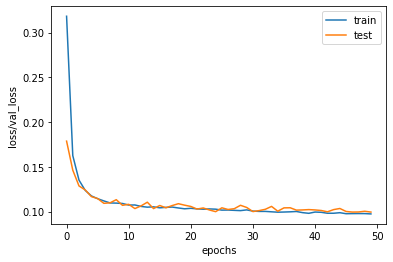

In [175]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss/val_loss")
plt.savefig("5minclean_loss.png")
plt.show()

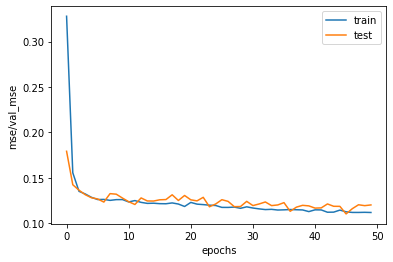

In [176]:
plt.plot(history.history['mse'], label = 'train')
plt.plot(history.history['val_mse'], label = 'test')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("mse/val_mse")
plt.savefig("5minclean_mse.png")
plt.show()

In [177]:
y_predicted = classifier.predict(X_test)

In [178]:
y_predicted

array([[-0.6579639],
       [ 1.6422973],
       [ 1.649228 ],
       ...,
       [-0.6961311],
       [-0.6954193],
       [-0.6967088]], dtype=float32)

In [179]:
#y_predicted = np.argmax(y_predicted, axis = 1)

In [180]:
#y_test = np.argmax(y_test, axis = 1)

In [181]:
y_test

array([[-0.69680782],
       [ 1.64359632],
       [ 1.64359632],
       ...,
       [-0.69680782],
       [-0.69680782],
       [-0.69680782]])

In [182]:
test_sum = y_test.sum()*15
test_sum

-626.9622022339782

In [183]:
predicted_sum = y_predicted.sum()*15
predicted_sum

-13215.288391113281

In [184]:
y_train

array([[ 1.64359632],
       [-0.69680782],
       [-0.69680782],
       ...,
       [-0.69680782],
       [ 0.70743467],
       [ 1.64359632]])

In [185]:
y_train_predicted = classifier.predict(X_train)

In [186]:
rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))

mae = mean_absolute_error(y_train, y_train_predicted)


# r_s = r2_score(predict_y,y_auxHeat)
r_s = r2_score(y_train, y_train_predicted)

print(rmse,mae,r_s)

0.3312424851651277 0.09452357304458399 0.8902691436863659


In [211]:
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_train_predicted), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_train, y_train_predicted), 3)) 
# print("Median absolute error =", round(sm.median_absolute_error(y_train, y_train_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_train, y_train_predicted), 3)) 
print("R2 score =", round(sm.r2_score(y_train, y_train_predicted), 3))

Mean absolute error = 0.095
Mean squared error = 0.11
Explain variance score = 0.893
R2 score = 0.89


In [208]:
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))

mae = mean_absolute_error(y_test, y_predicted)


# r_s = r2_score(predict_y,y_auxHeat)
r_s = r2_score(y_test, y_predicted)

print(rmse,mae,r_s)

0.34639867295689303 0.09949301589908664 0.8800412250246603


In [212]:
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predicted), 3)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predicted), 3)) 
# print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predicted), 3)) 
print("R2 score =", round(sm.r2_score(y_test, y_predicted), 3))

Mean absolute error = 0.099
Mean squared error = 0.12
Explain variance score = 0.883
R2 score = 0.88


In [188]:
from sklearn.metrics import mean_absolute_error,f1_score,accuracy_score,mean_squared_error

In [189]:
# y_train_predicted = classifier.predict(X_train)
# y_train_predicted = np.argmax(y_train_predicted, axis = 1)
# y_train = np.argmax(y_train, axis = 1)

In [190]:
cutoff = 0.5                                                      
y_pred_classes_train = np.zeros_like(y_train_predicted)    
y_pred_classes_train[y_train_predicted > cutoff] = 1 
y_train_classes = np.zeros_like(y_train_predicted)
y_train_classes[y_train > cutoff] = 1

In [191]:
confusion_matrix(y_train_classes,y_pred_classes_train)

array([[27569,   228],
       [ 1152, 10405]])

In [192]:
mean_squared_error(y_train, y_train_predicted)

0.10972158397836987

In [193]:
f1_score(y_train_classes, y_pred_classes_train)

0.9378098242451555

In [194]:
accuracy_score(y_train_classes, y_pred_classes_train)

0.9649336789144687

In [195]:
mean_absolute_error(y_train_classes, y_pred_classes_train)

0.03506632

In [196]:
mean_squared_error(y_train_classes, y_pred_classes_train)

0.03506632

In [197]:
cutoff = 0.5                                                      
y_pred_classes = np.zeros_like(y_predicted)    
y_pred_classes[y_predicted > cutoff] = 1  
y_test_classes = np.zeros_like(y_predicted)
y_test_classes[y_test > cutoff] = 1

In [198]:
confusion_matrix(y_test_classes, y_pred_classes)

array([[11795,   122],
       [  513,  4436]])

In [199]:
mean_squared_error(y_test_classes, y_pred_classes)

0.03764971

In [200]:
mean_absolute_error(y_test_classes, y_pred_classes)

0.03764971

In [201]:
r_s = r2_score(y_test_classes, y_pred_classes)

In [202]:
r_s

0.8184060274328122

In [203]:
accuracy_score(y_test_classes, y_pred_classes)

0.9623502905253172

In [204]:
f1_score(y_test_classes, y_pred_classes)

0.9332071105501211

In [125]:
def FunctionFindBestParams(X_train, y_train, batch_size_list, epoch_list):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=batch_size_list
    epoch_list=epoch_list
    
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'mse'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
#             classifier = Sequential()
#             classifier.add(Dense(units=10, input_dim=24, kernel_initializer='uniform', activation='relu'))
#             classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
#             classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
#             classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            
            classifier = Sequential()

            # Adding the input layer and the first hidden layer
            classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))

            # Adding the second hidden layer
            classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

            # Adding the output layer
            classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))


            # Compiling the ANN
            classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 
            
            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            #Accuracy = survivalANN_Model.history['accuracy'][-1]
            MSE = survivalANN_Model.history['mse'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'mse:', MSE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), MSE]],
                                                                    columns=['TrialNumber', 'Parameters', 'mse'] ))
    return(SearchResultsData)

In [126]:
batch_size_list=[10, 15, 20, 50, 60]
epoch_list=[ 10, 20, 30, 50, 100]

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train,batch_size_list, epoch_list)

1 Parameters: batch_size: 10 - epochs: 10 mse: 0.13129690289497375
2 Parameters: batch_size: 10 - epochs: 20 mse: 0.13006922602653503
3 Parameters: batch_size: 10 - epochs: 30 mse: 0.12701910734176636
4 Parameters: batch_size: 10 - epochs: 50 mse: 0.116492860019207
5 Parameters: batch_size: 10 - epochs: 100 mse: 0.11026851087808609
6 Parameters: batch_size: 15 - epochs: 10 mse: 0.12919601798057556
7 Parameters: batch_size: 15 - epochs: 20 mse: 0.12329013645648956
8 Parameters: batch_size: 15 - epochs: 30 mse: 0.1247076541185379
9 Parameters: batch_size: 15 - epochs: 50 mse: 0.11801446974277496
10 Parameters: batch_size: 15 - epochs: 100 mse: 0.1126977801322937
11 Parameters: batch_size: 20 - epochs: 10 mse: 0.12791265547275543
12 Parameters: batch_size: 20 - epochs: 20 mse: 0.12617109715938568
13 Parameters: batch_size: 20 - epochs: 30 mse: 0.1280682533979416
14 Parameters: batch_size: 20 - epochs: 50 mse: 0.1251058131456375
15 Parameters: batch_size: 20 - epochs: 100 mse: 0.1098070293

In [139]:
# Printing the best parameter
print(ResultsData.sort_values(by='mse', ascending=False))
 
# Visualizing the results
# %matplotlib inline
# ResultsData.plot(x='Parameters', y='mse', figsize=(15,4), kind='line', rot=20)

  TrialNumber             Parameters       mse
0           1   batch_size10-epoch10  0.131297
0           2   batch_size10-epoch20  0.130069
0           6   batch_size15-epoch10  0.129196
0          16   batch_size50-epoch10  0.128865
0          21   batch_size60-epoch10  0.128126
0          13   batch_size20-epoch30  0.128068
0          11   batch_size20-epoch10  0.127913
0           3   batch_size10-epoch30  0.127019
0          12   batch_size20-epoch20  0.126171
0          14   batch_size20-epoch50  0.125106
0          18   batch_size50-epoch30  0.125028
0           8   batch_size15-epoch30  0.124708
0          22   batch_size60-epoch20  0.124515
0          23   batch_size60-epoch30  0.123551
0           7   batch_size15-epoch20  0.123290
0          17   batch_size50-epoch20  0.123276
0          24   batch_size60-epoch50  0.119150
0           9   batch_size15-epoch50  0.118014
0           4   batch_size10-epoch50  0.116493
0          19   batch_size50-epoch50  0.113409
0          10

In [231]:
##Cross Validation

In [329]:
from sklearn.model_selection import cross_validate, GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor